In [93]:
import umap

In [94]:
import pandas as pd

In [95]:
import numpy as np

In [96]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [97]:
training_set_fingerprint_address='../[M+H]+_metlin_fingerprints.bin'

In [98]:
training=pd.read_pickle(training_set_fingerprint_address)

In [99]:
training

,InChIKey,cactvs_fingerprint,metlin_adduct_or_nist,cid,fingerprint_array
0,UQTZMGFTRHFAAM-UHFFFAOYSA-N,1100000001110010001100000000000000000000000000...,[M+H]+,6272.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
1,RLAWWYSOJDYHDC-UHFFFAOYSA-N,1110000001111011001110000000000000000000000000...,[M+H]+,3937.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
2,BAWFJGJZGIEFAR-UHFFFAOYSA-N,1110000001111011101111000000001100000000000000...,[M+H]+,925.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
3,BKRGVLQUQGGVSM-UHFFFAOYSA-N,1110000001111011101000000000000000000000000000...,[M+H]+,3938.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
4,LSQZJLSUYDQPKJ-UHFFFAOYSA-N,1110000001111011001110000000000001000000000000...,[M+H]+,2171.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
...,...,...,...,...,...
4049,PMMQOFWSZRQWEV-UHFFFAOYSA-N,1111000001111010001111000000000000000000000000...,[M+H]+,10325960.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
4050,XZFSMUXVAYCHFO-UHFFFAOYSA-N,1111000001111111101100000000000000000000000000...,[M+H]+,641596.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
4051,RLNIWODKAMVILO-UHFFFAOYSA-N,1110000001110000001100000000000000000000000000...,[M+H]+,54273075.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
4052,NNJVILVZKWQKPM-UHFFFAOYSA-N,1110000001110011001000000000000000000000000000...,[M+H]+,3676.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."


In [100]:
X_metlin=np.array(training.fingerprint_array.to_list())

In [101]:
np.shape(X_metlin)

(4040, 881)

In [102]:
hcd_pos_nist_address='../[M+H]+_hcd_cohort_fingerprints.bin'

In [103]:
hcd_pos_nist_panda=pd.read_pickle(hcd_pos_nist_address)

In [104]:
hcd_pos_nist_panda=hcd_pos_nist_panda.reset_index()

In [105]:
X_nist=np.array(hcd_pos_nist_panda.fingerprint_array.to_list())

In [106]:
np.shape(X_nist)

(8298, 881)

In [109]:
X=np.vstack((X_metlin,X_nist))

In [110]:
np.shape(X)

(12338, 881)

In [111]:
n_neighbors=10
min_dist=0.1
n_components=2
metric='jaccard'

In [112]:
my_UMAP=umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,n_components=n_components,metric=metric)

In [113]:
my_fingerprints_embeded=my_UMAP.fit_transform(X)

/home/rictuar/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [120]:
cheap_colors=['red' for i in range(4040)] + ['r' for i in range(8298)]
expensive_colors=['red' for i in range(4040)] + [cm.viridis(1-hcd_pos_nist_panda.at[i,'dot_product']) for i in range(8298)]

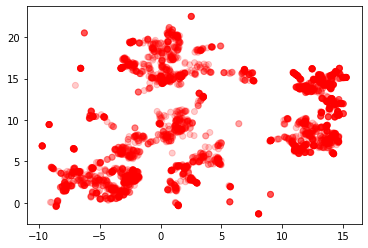

In [122]:
plt.scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    c=cheap_colors[0:4040],
    alpha=0.2
)

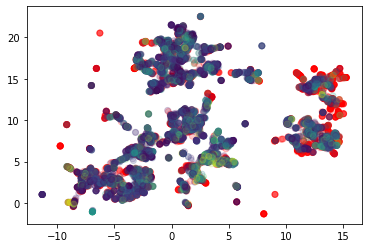

In [121]:
plt.scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    c=cheap_colors[0:4040],
    alpha=0.2
)
plt.scatter(
    my_fingerprints_embeded[4040:,0],
    my_fingerprints_embeded[4040:,1],
    c=expensive_colors[4040:],
    alpha=0.2
)